In [11]:
import pandas as pd
import numpy as np

shark_data_unclean = pd.read_csv('data/data_adding_more_weather.csv', encoding = "ISO-8859-1")

In [12]:
shark_data_unclean = shark_data_unclean.drop("Unnamed: 0" , 1)
shark_data_unclean['Age'] = pd.to_numeric(shark_data_unclean['Age'], errors='coerce')
shark_data_unclean['Time'] = pd.to_numeric(shark_data_unclean['Time'], errors='coerce')
shark_data_unclean

,Unnamed: 0.1,Date,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
0,1,09-Sep-2021,Unprovoked,surfing,M,6.0,Minor injury to right arm,N,1320.0,Not Determined,09-Sep-2021,"USA Florida Ponce Inlet, Volusia County",29.096373,-80.936998,26.1,1.0,16.2,1012.5
1,2,05-Sep-2021,Unprovoked,surfing,M,31.0,FATAL,Y,1030.0,White xhark,05-Sep-2021,AUSTRALIA New South Wales Emerald Beach,-30.157479,153.150195,13.6,4.6,20.4,1017.3
2,4,28-Aug-2021,Unprovoked,boarding,M,NaN,Lacerations both sides of lower leg immediatel...,N,1145.0,Not Determined,28-Aug-2021,"USA Texas Galveston Island, Galveston County",29.241005,-94.909133,29.4,2.5,10.4,1013.7
3,5,03-Sep-2021,Unprovoked,fell,M,64.0,Severe injury to leg,N,1400.0,Not Determined,03-Sep-2021,USA Louisiana off Grand Isle,29.236617,-89.987294,27.2,3.9,5.1,1014.6
4,6,21-Aug-2021,Unprovoked,surfing,M,41.0,Left ankle and foot bitten,N,640.0,Bull shark,21-Aug-2021,"USA Florida Walton Beach Psrk, St. Lucie County",27.337890,-80.233431,28.9,0.2,11.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,5947,05-Sep-1900,Unprovoked,floating,M,NaN,"Bathing suit torn & ""imprints of the shark's t...",N,1800.0,Not Determined,05-Sep-1900,"USA Hawaii Waikiki Beach, Oahu",21.279346,-157.829185,NaN,NaN,NaN,NaN
4132,5948,21-Aug-1900,Unprovoked,bathing,M,NaN,Left hand lacerated,N,1800.0,Not Determined,21-Aug-1900,"USA North Carolina Southport, Brunswick County",33.918209,-78.019301,NaN,NaN,NaN,NaN
4133,5949,31-Jul-1900,Unprovoked,swimming,M,NaN,FATAL,Y,9999.0,Not Determined,31-Jul-1900,"CROATIA Primorje-Gorski Kotar County Volosko,...",45.350000,14.316667,NaN,NaN,NaN,NaN
4134,5951,Late Jul-1900,Provoked,NaN,Not Determined,NaN,"No injury to occupants. They shot shark, then ...",N,9999.0,Not Determined,Late Jul-1900,"USA Connecticut Bridgeport, Fairfield County",41.179226,-73.189438,NaN,NaN,NaN,NaN


In [13]:
shark_data_unclean.value_counts("Type")

Type
Unprovoked    3696
Provoked       440
dtype: int64

In [14]:
shark_data_unclean["Activity"]

Activity
surfing          1060
swimming          724
fishing           311
spearfishing      304
diving            273
                 ... 
kneeling            1
kitesurfing         1
kakaying            1
hooked              1
ÂswallowedÂ       1
Length: 185, dtype: int64

In [29]:
shark_data_unclean.sort_values("Activity")


,Unnamed: 0.1,Date,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
2108,2737,10-Aug-1995,Unprovoked,"""riding",F,14.0,Left foot bitten,N,9999.0,Blacktip shark,10-Aug-1995,"USA South Carolina Ocean Lakes Campground, sou...",33.628649,-78.962329,24.6,NaN,12.1,NaN
3980,5659,29-May-1919,Unprovoked,"""swimming",M,NaN,Left foot bitten & abraded,N,1200.0,Not Determined,29-May-1919,"USA South Carolina James Island Sound, Charleston",32.727355,-79.967709,NaN,NaN,NaN,NaN
2147,2788,09-Dec-1994,Unprovoked,(submerged,M,42.0,"FATAL, right leg nearly severed, puncture woun...",Y,845.0,5 m to 5.5 m [16.5' to 18'] white shark,09-Dec-1994,"USA California San Miguel Island, Santa Barbar...",34.037616,-120.372374,NaN,NaN,NaN,NaN
3218,4377,29-May-1960,Unprovoked,ascended,M,27.0,Face lacerated,N,830.0,Not Determined,29-May-1960,PANAMA San Blas Islands Off Diable Island,8.977983,-79.520907,NaN,NaN,NaN,NaN
3400,4646,04-Mar-1956,Unprovoked,attacked,M,26.0,FATAL,Y,1645.0,3.7 m [12'] shark & may have been another shar...,04-Mar-1956,"AUSTRALIA Victoria Portsea Beach, near entranc...",-38.319221,144.713353,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,5754,1913,Unprovoked,NaN,M,NaN,FATAL,Y,9999.0,Not Determined,1913,REUNION Saint-Denis Barachoise bridge,-20.872857,55.447122,NaN,NaN,NaN,NaN
4104,5901,07-Feb-1904,Unprovoked,NaN,M,NaN,FATAL,Y,9999.0,Not Determined,07-Feb-1904,AUSTRALIA Queensland Brisbane,-27.470453,153.026034,NaN,NaN,NaN,NaN
4120,5927,Jun-1902,Unprovoked,NaN,M,NaN,Bitten on hand and thigh,N,9999.0,Not Determined,Jun-1902,"EGYPT Mediterranean Sea Tzortzou Reef, Marsa M...",31.373629,27.170540,NaN,NaN,NaN,NaN
4134,5951,Late Jul-1900,Provoked,NaN,Not Determined,NaN,"No injury to occupants. They shot shark, then ...",N,9999.0,Not Determined,Late Jul-1900,"USA Connecticut Bridgeport, Fairfield County",41.179226,-73.189438,NaN,NaN,NaN,NaN


In [7]:
shark_data_unclean.columns

Index(['Unnamed: 0.1', 'Date', 'Type', 'Activity', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Proper_date', 'Full Location',
       'latitude', 'longitude', 'avg_temp', 'precipitation', 'wind_speed',
       'sea_level_pressure'],
      dtype='object')

In [8]:
shark_data_unclean = shark_data_unclean[["Type", "Activity", "Fatal (Y/N)", "Sex ", "wind_speed"]]
shark_data_unclean = shark_data_unclean.dropna()

shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Unprovoked", '0')
shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Provoked", '1')

shark_data_unclean['Activity'] = pd.factorize(shark_data_unclean['Activity'])[0] 
shark_data_unclean['Fatal (Y/N)'] = pd.factorize(shark_data_unclean['Fatal (Y/N)'])[0] 
shark_data_unclean['Sex '] = pd.factorize(shark_data_unclean['Sex '])[0] 
shark_data_unclean['wind_speed'] = pd.factorize(shark_data_unclean['wind_speed'])[0] 

#shark_data_unclean['Time'] = pd.factorize(shark_data_unclean['Time'])[0] 
#shark_data_unclean['Age'] = pd.factorize(shark_data_unclean['Age'])[0] 
#shark_data_unclean['sea_level_pressure'] = pd.factorize(shark_data_unclean['sea_level_pressure'])[0] 

shark_data_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 3662
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         1392 non-null   object
 1   Activity     1392 non-null   int64 
 2   Fatal (Y/N)  1392 non-null   int64 
 3   Sex          1392 non-null   int64 
 4   wind_speed   1392 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 65.2+ KB


In [9]:
shark_data_unclean.value_counts("Activity")

Activity
0     546
3     240
12     90
1      83
7      72
     ... 
36      1
38      1
15      1
41      1
63      1
Length: 64, dtype: int64

In [83]:
from sklearn.preprocessing import MinMaxScaler

df = shark_data_unclean.copy(deep=True)
X = df.drop("Type", axis=1)
y = df["Type"]

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    tree_clf = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    target_names = ['Unprovoked', 'Provoked']
    column_names = df.drop(['Type'], axis=1).columns

    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


Avg unprovoked precision:  0.9472435703289562
Avg provoked precision:  0.6470090480984446


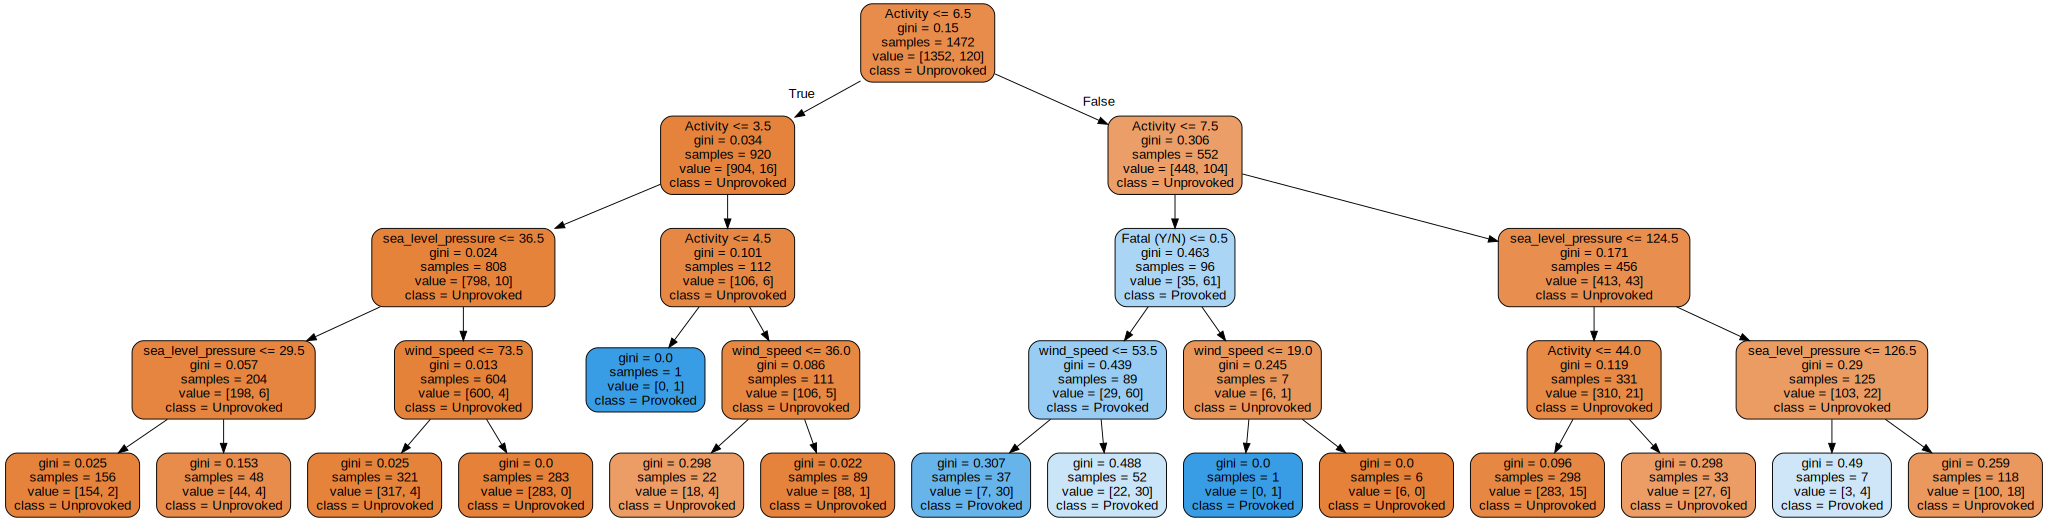

In [69]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=("shark_attack_tree.dot"),
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file("shark_attack_tree.dot")

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9207920792079254
Avg provoked precision:  0.1153846153846156


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9375
Avg provoked precision:  0.14705882352941224


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = 20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Avg unprovoked precision:  0.9173534102477093
Avg provoked precision:  0.0


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

In [73]:
from sklearn.ensemble import RandomForestClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10
num_tests = 5

for i in range(1, num_tests):
    total_precision_un = 0
    total_precision_p = 0
    for j in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        clf = RandomForestClassifier(n_estimators = 100*i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
        total_precision_un += result_metrics["Unprovoked"]["precision"]
        total_precision_p += result_metrics["Provoked"]["precision"]

    print("Avg unprovoked precision: ", total_precision_un / num_times)
    print("Avg provoked precision: ", total_precision_p / num_times)
    print()

Avg unprovoked precision:  0.938073053564006
Avg provoked precision:  0.3558092744769909

Avg unprovoked precision:  0.9377035760615611
Avg provoked precision:  0.3015268065268065

Avg unprovoked precision:  0.9367056029786978
Avg provoked precision:  0.445540528037011

Avg unprovoked precision:  0.9376154435747728
Avg provoked precision:  0.408011703724552



In [74]:
from sklearn.neural_network import MLPClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = MLPClassifier(random_state=42, solver='lbfgs', max_iter=200)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Avg unprovoked precision:  0.9314331051586722
Avg provoked precision:  0.43555150731621317


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
